<a href="https://colab.research.google.com/github/Rukaya-lab/Tensorflow-practice/blob/main/Dp_Classification%2C_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is using the cardiovascular disease data to predict whether a person has heart disease.

The approach is to use a deep learning model while comparing the performance of the model when all the features of the dataset are used for training against when the most important 

features are first selected using the Recursive Feature Elimination (RFE) approch and the trained on the model.

The deep learning frame work applied is tensorflow.


In [128]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Import Libraries**

In [129]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

**Load the data with pandas**

### Data Dictionary

- age - age in years

- sex - (1 = male; 0 = female)
- cp - chest pain type
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1=yes, 0=no)

In [131]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/heart_disease.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [132]:
data.isnull().sum().sum()

0

In [133]:
data.shape

(303, 14)

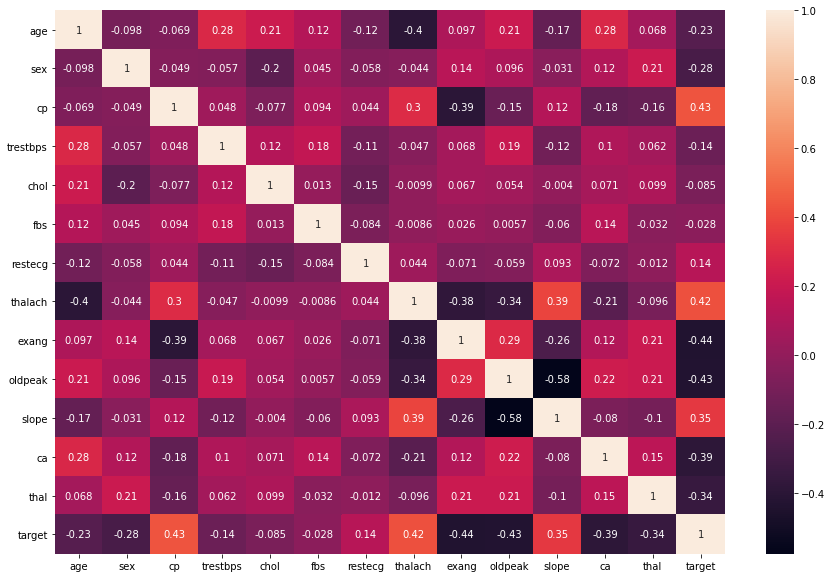

In [134]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True)

In [135]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

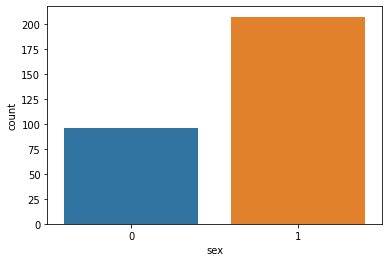

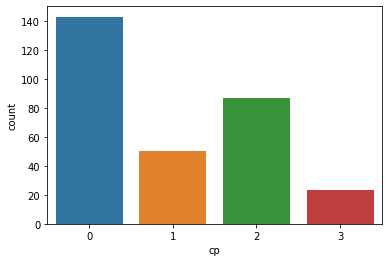

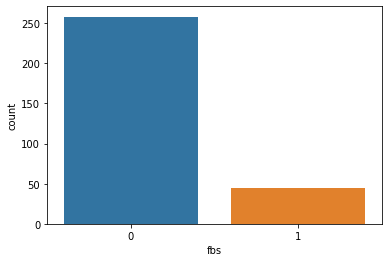

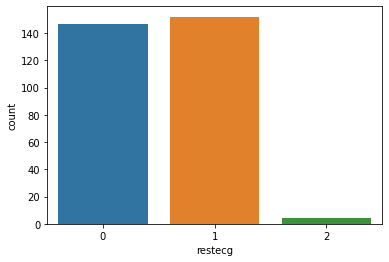

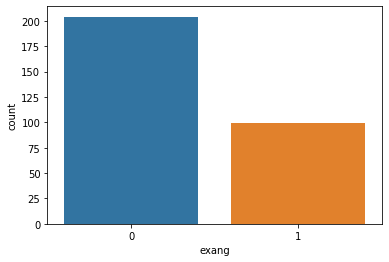

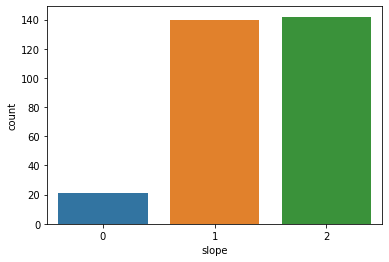

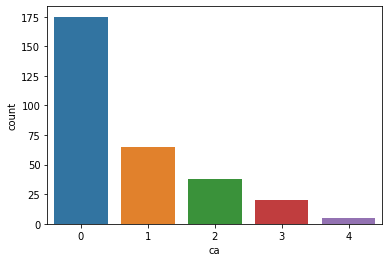

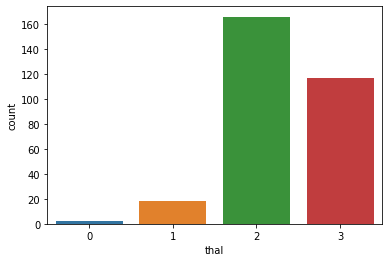

In [136]:

for k, cols in enumerate(cat_cols):
  sns.countplot(data[cols])
  plt.show()

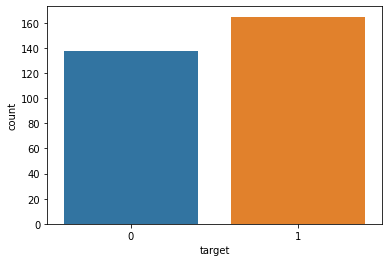

In [137]:
sns.countplot(data.target)

##### Since there is not an imbalance in the target feature, hence no need for imbalance treatment

**Splitting the Data**

In [138]:
X = data.drop('target', axis = 1)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

**Feature Selection**

In [139]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier()

rfe = RFE(estimator= rdf, step= 1) #estimator is the baseline model

fit= rfe.fit(X_train, y_train)

print('Num features: %d' %fit.n_features_)
print('Selected Features: %s' %fit.support_)
print('Feature Ranking: %s' %fit.ranking_)

Num features: 6
Selected Features: [ True False  True False False False False  True False  True False  True
  True]
Feature Ranking: [1 6 1 3 2 8 7 1 4 1 5 1 1]


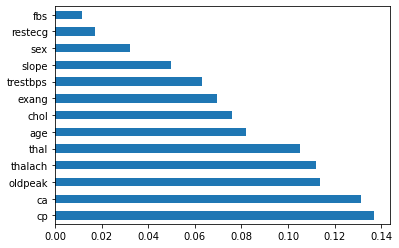

<Figure size 1080x720 with 0 Axes>

In [140]:
#plot feature importance graph
rdf.fit(X_train, y_train)


feat_importances= pd.Series(rdf.feature_importances_, index= X_train.columns)
feat_importances.nlargest(13).plot(kind= 'barh')
plt.figure(figsize= (15,10))
plt.show()

In [141]:
## creating subset of the data with only the selected features

# transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

### Building Sequential Model

Building the model with all the features first and evaluating the performance

In [142]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), name = 'hidden_layer1'))   
model.add(Dense(16, activation='relu', name = 'hidden_layer2'))
model.add(Dense(8, activation='relu', name = 'hidden_layer3'))
model.add(Dense(1, activation='sigmoid', name = 'output_layer'))

In [143]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [144]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 32)                448       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 16)                528       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 8)                 136       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


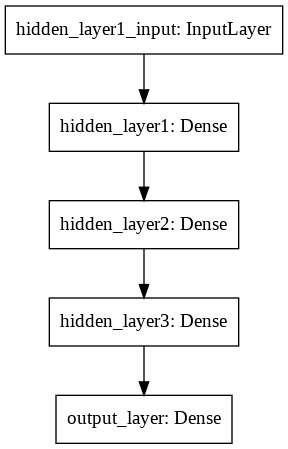

In [145]:
# plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [146]:
#training the model

history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 200, batch_size = 10, verbose = 1)

Epoch 1/200
17/17 [==============================] - 1s 31ms/step - loss: 7.4198 - accuracy: 0.5650 - val_loss: 2.0599 - val_accuracy: 0.5116
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 1.5773 - accuracy: 0.5325 - val_loss: 0.7228 - val_accuracy: 0.5349
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6747 - accuracy: 0.5345 - val_loss: 0.6745 - val_accuracy: 0.5814
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6681 - accuracy: 0.5280 - val_loss: 0.6641 - val_accuracy: 0.6047
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.6629 - accuracy: 0.5859 - val_loss: 0.6649 - val_accuracy: 0.5814
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.6171 - accuracy: 0.5880 - val_loss: 0.6153 - val_accuracy: 0.6279
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.6155 - val_loss: 0.6034 - val_accuracy: 0.6977
Epoch 8/200


In [147]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.5863 - accuracy: 0.8132


[0.5862675905227661, 0.8131868243217468]

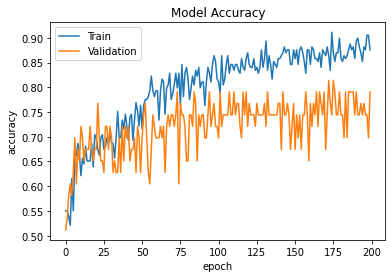

In [148]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## **Training the model with the selected features**

In [149]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_rfe.shape[1],), name = 'hidden_layer1'))   
model.add(Dense(16, activation='relu', name = 'hidden_layer2'))
model.add(Dense(8, activation='relu', name = 'hidden_layer3'))
model.add(Dense(1, activation='sigmoid', name = 'output_layer'))

In [150]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [151]:
#training the model

history1 = model.fit(X_train_rfe, y_train, validation_split = 0.2, epochs = 200, batch_size = 10, verbose = 1)

Epoch 1/200
17/17 [==============================] - 1s 13ms/step - loss: 2.8753 - accuracy: 0.3862 - val_loss: 0.7481 - val_accuracy: 0.4651
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.8457 - accuracy: 0.4852 - val_loss: 0.6528 - val_accuracy: 0.4884
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.8624 - accuracy: 0.4562 - val_loss: 0.7227 - val_accuracy: 0.4884
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.7825 - accuracy: 0.4930 - val_loss: 0.6809 - val_accuracy: 0.5349
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.6388 - accuracy: 0.6651 - val_loss: 0.5374 - val_accuracy: 0.7907
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.8819 - accuracy: 0.4912 - val_loss: 0.7125 - val_accuracy: 0.6047
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.8536 - accuracy: 0.5238 - val_loss: 0.6146 - val_accuracy: 0.5814
Epoch 8/200


In [152]:
model.evaluate(X_test_rfe, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.5124 - accuracy: 0.8022


[0.5124227404594421, 0.8021978139877319]

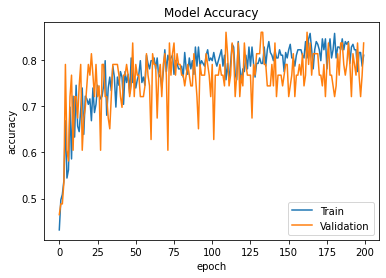

In [153]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### Conclusion

The loss difference using all the features on the train and validation set are a bit far apart but the loss and accuracy on the test set is higher than that of the validation set

Even though the accuracy of the train set didn't experience any significant positive change, it is worthy noting that with a few of the features the model was still able to learn 

enough of the operations of the dataset and perform fairly while and the loss difference is set to low. On the flip side the validation dataset perfromed better when the features were 

slected which can then translate to the fact that any unseen dataset tested with the second model is going to be close to its ground truth. 